In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [3]:
data = pd.read_csv('AirPassengers.csv')
data['Month'] = pd.to_datetime(data['Month'], infer_datetime_format=True)
indexData = data.set_index(["Month"])

In [4]:
from datetime import datetime
indexData.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


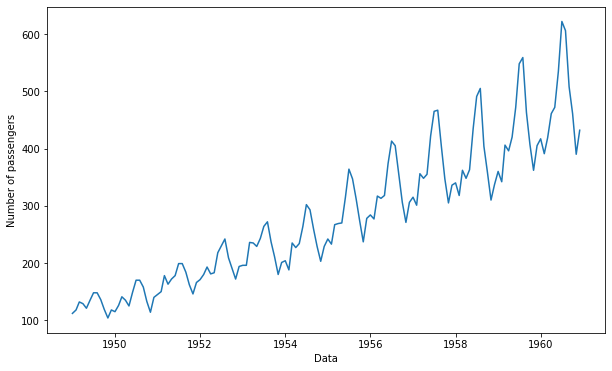

In [5]:
#plot graph
plt.xlabel("Data")
plt.ylabel("Number of passengers")
plt.plot(indexData)

In [10]:
#determining statistics
mean = indexData.rolling(window=12).mean()
std = indexData.rolling(window=12).std()
print(mean,std)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


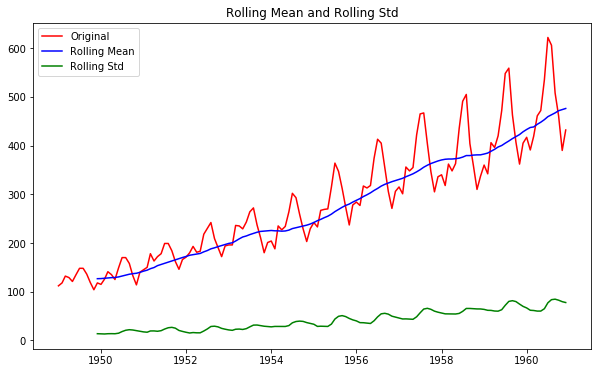

In [11]:
#plot statistics
org = plt.plot(indexData, color='red',label="Original")
me = plt.plot(mean,color='blue',label="Rolling Mean")
s = plt.plot(std,color='green',label="Rolling Std")
plt.legend(loc='best')
plt.title('Rolling Mean and Rolling Std')
plt.show(block=False)

In [15]:
#Perform Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller test: ')
datatest=adfuller(indexData['#Passengers'],autolag='AIC')

dataout=pd.Series(datatest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations'])
for key,value in datatest[4].items():
    dataout['Critical Value (%s)'%key] = value
    
    print(dataout)

Results of Dickey-Fuller test: 
Test Statistic              0.815369
p-value                     0.991880
#Lags Used                 13.000000
Number of Observations    130.000000
Critical Value (1%)        -3.481682
dtype: float64
Test Statistic              0.815369
p-value                     0.991880
#Lags Used                 13.000000
Number of Observations    130.000000
Critical Value (1%)        -3.481682
Critical Value (5%)        -2.884042
dtype: float64
Test Statistic              0.815369
p-value                     0.991880
#Lags Used                 13.000000
Number of Observations    130.000000
Critical Value (1%)        -3.481682
Critical Value (5%)        -2.884042
Critical Value (10%)       -2.578770
dtype: float64


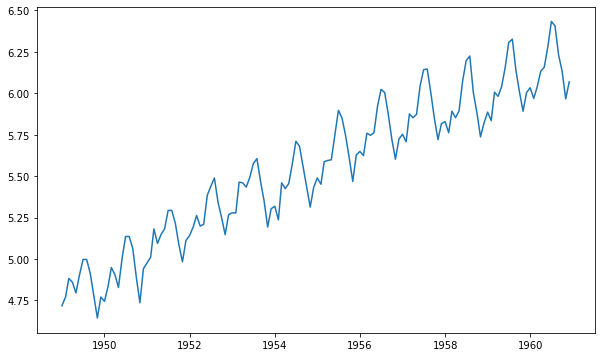

In [16]:
#Estimating trends
indexData_logscale = np.log(indexData)
plt.plot(indexData_logscale)

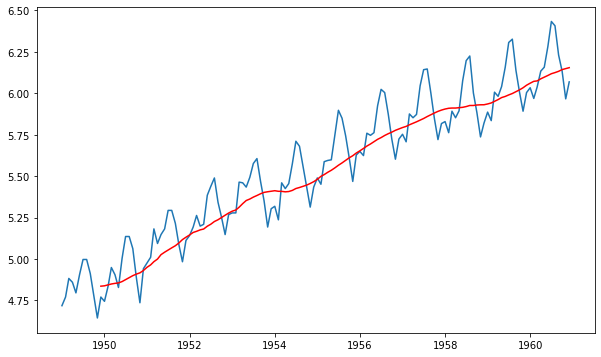

In [17]:
movingAvg = indexData_logscale.rolling(window=12).mean()
movingStd = indexData_logscale.rolling(window=12).std()
plt.plot(indexData_logscale)
plt.plot(movingAvg,color='red')

In [21]:
dataset_logscale = indexData_logscale-movingAvg
dataset_logscale.head()

#Remove null values
dataset_logscale.dropna(inplace=True)
dataset_logscale.head()

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


In [41]:
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
    movingAvg=timeseries.rolling(window=12).mean()
    movingStd=timeseries.rolling(window=12).std()
    
    #plot statistics
    org = plt.plot(timeseries, color='red',label="Original")
    me = plt.plot(movingAvg,color='blue',label="Rolling Mean")
    s = plt.plot(movingStd,color='green',label="Rolling Std")
    plt.legend(loc='best')
    plt.title('Rolling Mean and Rolling Std')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test
    from statsmodels.tsa.stattools import adfuller
    print('Results of Dickey-Fuller test: ')
    datatest=adfuller(timeseries['#Passengers'],autolag='AIC')

    dataout=pd.Series(datatest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations'])
    for key,value in datatest[4].items():
        dataout['Critical Value (%s)'%key] = value
    
        print(dataout)

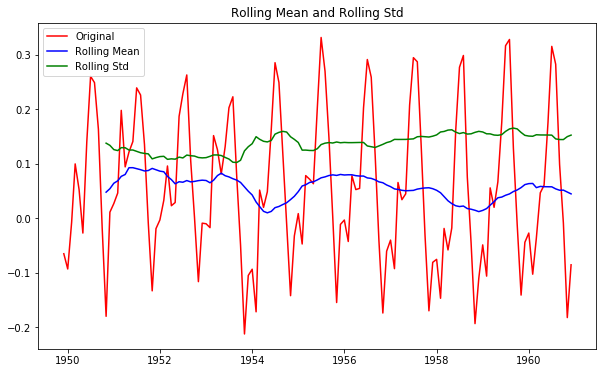

Results of Dickey-Fuller test: 
Test Statistic             -3.162908
p-value                     0.022235
#Lags Used                 13.000000
Number of Observations    119.000000
Critical Value (1%)        -3.486535
dtype: float64
Test Statistic             -3.162908
p-value                     0.022235
#Lags Used                 13.000000
Number of Observations    119.000000
Critical Value (1%)        -3.486535
Critical Value (5%)        -2.886151
dtype: float64
Test Statistic             -3.162908
p-value                     0.022235
#Lags Used                 13.000000
Number of Observations    119.000000
Critical Value (1%)        -3.486535
Critical Value (5%)        -2.886151
Critical Value (10%)       -2.579896
dtype: float64


In [42]:
test_stationary(dataset_logscale)

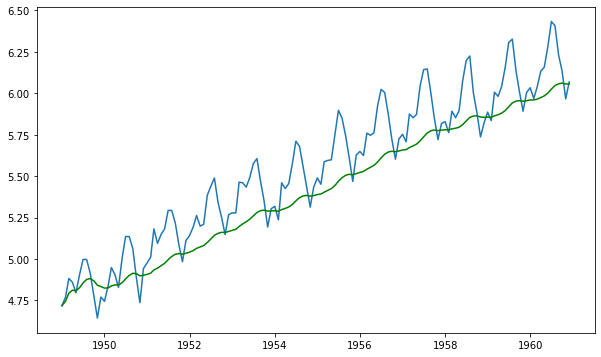

In [43]:
exponentialweightAvg = indexData_logscale.ewm(halflife=12, min_periods=0,adjust=True).mean()
plt.plot(indexData_logscale)
plt.plot(exponentialweightAvg, color='green')

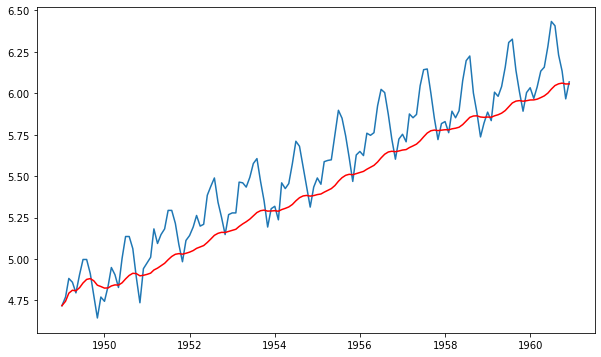

In [44]:
datasetmovingexponent = indexData_logscale-exponentialweightAvg
plt.plot(indexData_logscale)
plt.plot(exponentialweightAvg, color='red')

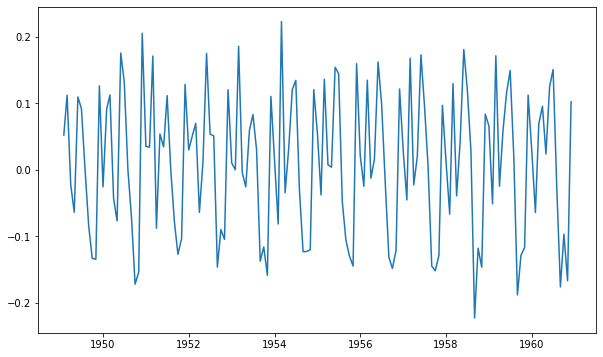

In [45]:
datasetlogshift=indexData_logscale-indexData_logscale.shift()
plt.plot(datasetlogshift)

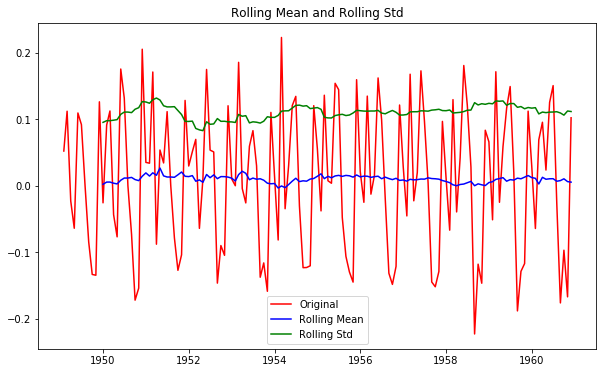

Results of Dickey-Fuller test: 
Test Statistic             -2.717131
p-value                     0.071121
#Lags Used                 14.000000
Number of Observations    128.000000
Critical Value (1%)        -3.482501
dtype: float64
Test Statistic             -2.717131
p-value                     0.071121
#Lags Used                 14.000000
Number of Observations    128.000000
Critical Value (1%)        -3.482501
Critical Value (5%)        -2.884398
dtype: float64
Test Statistic             -2.717131
p-value                     0.071121
#Lags Used                 14.000000
Number of Observations    128.000000
Critical Value (1%)        -3.482501
Critical Value (5%)        -2.884398
Critical Value (10%)       -2.578960
dtype: float64


In [46]:
datasetlogshift.dropna(inplace=True)
test_stationary(datasetlogshift)

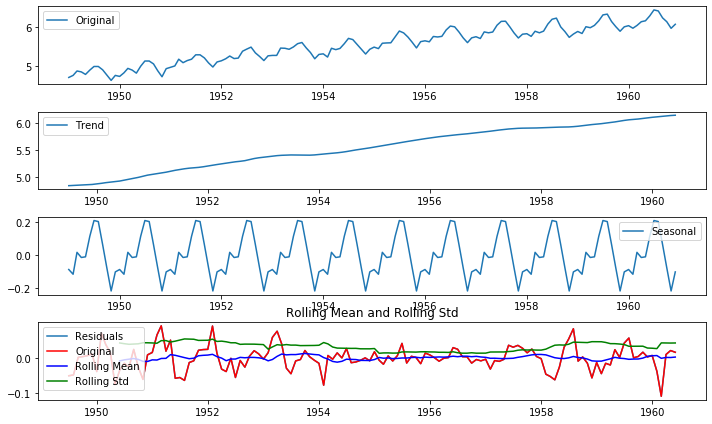

Results of Dickey-Fuller test: 


KeyError: '#Passengers'

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexData_logscale)

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.subplot(411)
plt.plot(indexData_logscale,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedlData=residual
decomposedlData.dropna(inplace=True)
test_stationary(decomposedlData)

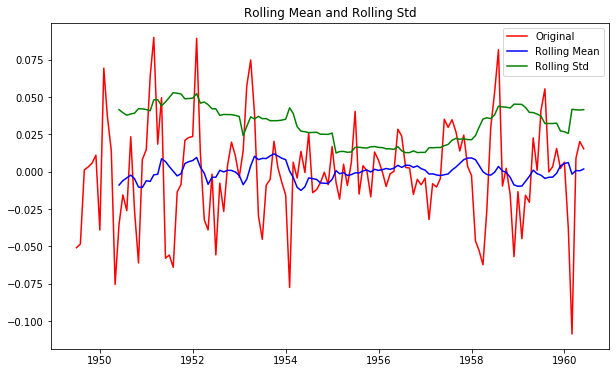

Results of Dickey-Fuller test: 


KeyError: '#Passengers'

In [48]:

decomposedlData=residual
decomposedlData.dropna(inplace=True)
test_stationary(decomposedlData)